#**BioPython**
The Biopython Project is a global collaboration of developers who create freely available [Python](https://www.python.org) tools for computational molecular biology. Python is a versatile, interpreted programming language that is gaining popularity in scientific computing. It offers an object-oriented approach, a clear syntax, and can be extended with modules written in languages like C, C++, or FORTRAN.

In [18]:
!pip install nglview

In [19]:
!pip install biopython


In [20]:
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.pairwise2 import format_alignment
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
import nglview as nv

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [23]:
!pip install colorama
from colorama import Back, Style, Fore

#**DNA**
DNA, short for **deoxyribonucleic acid**, is the fundamental genetic material that holds the blueprint for all the traits and features of living organisms. It is composed of building blocks called, which consist of a sugar and a phosphate molecule forming the DNA backbone, along with one of four organic bases: adenine (**A**), guanine (**G**), cytosine (**C**), and thymine (**T**).

The `SeqIO.parse` function in Biopython expects a local file path as the first argument. It cannot directly analyze a remote file from a URL. To resolve this, you can download the file from the GitHub URL and save it locally, then provide the local file path to `SeqIO.parse`.

In [41]:
import urllib.request
from Bio import SeqIO

# Download the file from the GitHub URL and save it locally
url = "https://raw.githubusercontent.com/JesicaAllende/CB-Bio/main/HPV16_genome.fasta"
local_file = "HPV16_genome.fasta"
urllib.request.urlretrieve(url, local_file)

# Review the local file using SeqIO.parse
for record in SeqIO.parse(local_file, "fasta"):
    print(record.id)

NC001526_A1
KU053861_A1
KU053833_A1
KU053879_A1
KU053829_A1
AF536179_A2
KU053897_A2
KU053900_A2
KU053899_A2
KU053901_A2
HQ644236_A3
HQ644245_A3
HQ644246_A3
AF534061_A4
KU053904_A4
KU053905_A4
HQ644261_A4
HQ644234_A4
AF536180_B1
KU053908_B1
KU053906_B1
KU053907_B1
AF472508_B1
HQ644298_B2
KU053915_B2
KU053910_B3
KU053909_B3
KU053914_B4
KU053913_B4
KU053911_B4
KU053912_B4
AF472509_C1
HQ644249_C1
KU053917_C1
HQ644292_C1
HQ644291_C1
HQ644244_C2
KU053921_C3
HQ644243_C3
KU053920_C3
KU053925_C4
KU053922_C4
KU053923_C4
KU053924_C4
HQ644257_D1
KU053927_D1
KU053930_D1
KU053929_D1
KU053928_D1
AY686579_D2
HQ644263_D2
KU053935_D2
HQ644281_D2
HQ644277_D2
AF402678_D3
KU053944_D3
HQ644295_D3
KU053943_D3
HQ644289_D3
KU053933_D4
KU053931_D4
KU053934_D4
KU053932_D4


Loading the FASTA file

In [46]:
from Bio import SeqIO
import requests

url = "https://raw.githubusercontent.com/JesicaAllende/CB-Bio/main/HPV16_genome.fasta"
response = requests.get(url)

with open("HPV16_genome.fasta", "w") as file:
    file.write(response.text)

records = SeqIO.parse("HPV16_genome.fasta", "fasta")
for record in records:
    print(record)


ID: NC001526_A1
Name: NC001526_A1
Description: NC001526_A1
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: KU053861_A1
Name: KU053861_A1
Description: KU053861_A1
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: KU053833_A1
Name: KU053833_A1
Description: KU053833_A1
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: KU053879_A1
Name: KU053879_A1
Description: KU053879_A1
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: KU053829_A1
Name: KU053829_A1
Description: KU053829_A1
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: AF536179_A2
Name: AF536179_A2
Description: AF536179_A2
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')
ID: KU053897_A2
Name: KU053897_A2
Description: KU053897_A2
Number of features: 0
Seq('ATGGCTGATCCTGCAGGTAC

In [48]:
from Bio import SeqIO
import requests

url = "https://raw.githubusercontent.com/JesicaAllende/CB-Bio/main/HPV16_genome.fasta"
response = requests.get(url)

with open("HPV16_genome.fasta", "w") as file:
    file.write(response.text)

records = SeqIO.parse("HPV16_genome.fasta", "fasta")
ncov_record = next(records)  # Get the first record
ncov_dna = ncov_record.seq
print(ncov_dna)



ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGGTTTTATGTAGAGGCTGTAGTGGAAAAAAAAACAGGGGATGCTATATCAGATGACGAGAACGAAAATGACAGTGATACAGGTGAAGATTTGGTAGATTTTATAGTAAATGATAATGATTATTTAACACAGGCAGAAACAGAGACAGCACATGCGTTGTTTACTGCACAGGAAGCAAAACAACATAGAGATGCAGTACAGGTTCTAAAACGAAAGTATTTGGGTAGTCCACTTAGTGATATTAGTGGATGTGTAGACAATAATATTAGTCCTAGATTAAAAGCTATATGTATAGAAAAACAAAGTAGAGCTGCAAAAAGGAGATTATTTGAAAGCGAAGACAGCGGGTATGGCAATACTGAAGTGGAAACTCAGCAGATGTTACAGGTAGAAGGGCGCCATGAGACTGAAACACCATGTAGTCAGTATAGTGGTGGAAGTGGGGGTGGTTGCAGTCAGTACAGTAGTGGAAGTGGGGGAGAGGGTGTTAGTGAAAGACACACTATATGCCAAACACCACTTACAAATATTTTAAATGTACTAAAAACTAGTAATGCAAAGGCAGCAATGTTAGCAAAATTTAAAGAGTTATACGGGGTGAGTTTTTCAGAATTAGTAAGACCATTTAAAAGTAATAAATCAACGTGTTGCGATTGGTGTATTGCTGCATTTGGACTTACACCCAGTATAGCTGACAGTATAAAAACACTATTACAACAATATTGTTTATATTTACACATTCAAAGTTTAGCATGTTCATGGGGAATGGTTGTGTTACTATTAGTAAGATATAAATGTGGAAAAAATAGAGAAACAATTGAAAAATTGCTGTCTAAACTATTATGTGTGTCTCCAATGTGTATGATGATAGAGCCTCCAAAATTGCGTAGTACAGCAGCAGCATTATATTGGTATAAAACAGGTATATCAAATATTAGTGAAGTGTATG

In [49]:
ncov_dna

Seq('ATGGCTGATCCTGCAGGTACCAATGGGGAAGAGGGTACGGGATGTAATGGATGG...ACC')

In [63]:
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

# color code to represent genome sequences
nu_clr_switcher = {
    # standard color-codes
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.CYAN,
    'T': Back.MAGENTA,
    ' ': Style.RESET_ALL
}
protein_clr_switcher = {
    # color-code by proteinfamily's polarity
    'A': Back.BLUE,
    'V': Back.BLUE,
    'I': Back.BLUE,
    'L': Back.BLUE,
    'M': Back.BLUE,
    'F': Back.BLUE,
    'Y': Back.CYAN,
    'W': Back.BLUE,
    'H': Back.CYAN,
    'R': Back.RED,
    'K': Back.RED,
    'N': Back.GREEN,
    'Q': Back.GREEN,
    'E': Back.MAGENTA,
    'D': Back.MAGENTA,
    'S': Back.GREEN,
    'T': Back.GREEN,
    'G': Back.YELLOW,
    'P': Back.YELLOW,
    'C': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL
    if strand == 'protein':
        for i in range(len(genome_str)):
            if genome_str[i] in protein_clr_switcher:
                if genome_str[i] == 'S' and genome_str[i+1:i+4] == 'TOP':
                    text = Style.RESET_ALL + 'S'
                elif genome_str[i] == 'T' and genome_str[i-1] == 'S' and genome_str[i+1:i+3] == 'OP':
                    text = Style.RESET_ALL + 'T'
                elif genome_str[i] == 'P' and genome_str[i-3:i] == 'STO':
                    text = Style.RESET_ALL + 'P'
                else:
                    text = protein_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                Style.RESET_ALL
                text = genome_str[i]
            print(text, end="")

###Visualizing the Nucleotides of the HPV16 DNA

In [64]:
print("HPV16_genome: ")
seq_repr(ncov_dna[0:300])

HPV16_genome: 
ATGGCTGATC CTGCAGGTAC CAATGGGGAA GAGGGTACGG GATGTAATGG ATGGTTTTAT
GTAGAGGCTG TAGTGGAAAA AAAAACAGGG GATGCTATAT CAGATGACGA GAACGAAAAT
GACAGTGATA CAGGTGAAGA TTTGGTAGAT TTTATAGTAA ATGATAATGA TTATTTAACA
CAGGCAGAAA CAGAGACAGC ACATGCGTTG TTTACTGCAC AGGAAGCAAA ACAACATAGA
GATGCAGTAC AGGTTCTAAA ACGAAAGTAT TTGGGTAGTC CACTTAGTGA TATTAGTGGA

Total Number of Nucleotides

In [52]:
len(ncov_dna)

7906

### Composition of each Nucleotide (%)

In [53]:
def nucleotides_composition(seq):
    nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for n in nucleotides:
        nucleotides[n] = seq.count(n)/len(seq)*100
    return nucleotides

In [54]:
ndict=nucleotides_composition(ncov_dna)
ndict

{'A': 32.86111813812295,
 'C': 17.417151530483178,
 'G': 19.12471540602074,
 'T': 30.597014925373134}

In [65]:
import pandas as pd
ndf = pd.DataFrame.from_dict(ndict, orient ='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})

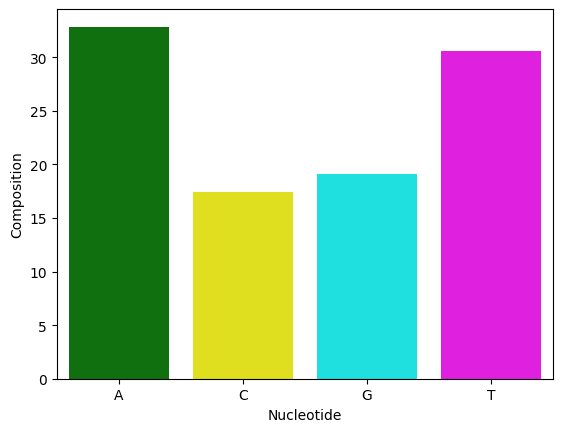

In [67]:
# Define the color palette
colors = ["green", "yellow", "cyan", "magenta"]

# Create the bar chart
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf, palette=colors)

# Display the plot
plt.show()

###GC-content of the DNA (%)

In PCR experiments, the GC-content of primers, which are short oligonucleotides, is commonly utilized to estimate their annealing temperature to the template DNA. A higher GC-content suggests a comparatively higher melting temperature, which is associated with increased stability.

In [68]:
from Bio.SeqUtils import GC
print(f"GC% :{GC(ncov_dna)}")

GC% :36.54186693650392


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


### Tri-nucleotide compositions (Tri-mer)
In bioinformatics, k-mers refer to subsequences of a specific length, denoted as 'k', that are extracted from a biological sequence. These k-mers are typically composed of nucleotides such as A, T, G, and C. The tri-nucleotide composition encodes the frequency of each 3-tuple of nucleic acid type in a nucleotide sequence.

They are utilized for tasks such as DNA sequence assembly, enhancing gene expression in different organisms, identifying species within metagenomic samples, and developing attenuated vaccines.

In [69]:
# tri-nucleotide compositions
trimers = ["AAA", "AAC", "AAG", "AAT", "ACA", "ACC", "ACG", "ACT", "AGA", "AGC", "AGG", "ATA", "ATC", "ATG", "CAA",
           "CAC", "CAG", "CCA","CCC","CCG","CGA","CGC","CTA","CTC","GAA","GAC","GCA","GCC","GGA","GTA","TAA","TCA"]

def trimer_composition(genome):
    trimer_dict = dict()
    for trimer in trimers:
        trimer_dict[trimer] = genome.count(trimer)
    return trimer_dict

In [70]:
composition = trimer_composition(ncov_dna)
total_composition = sum(composition.values())
norm_freq = [count/total_composition for count in composition.values()]
print(composition)
print(total_composition)
print(norm_freq)

{'AAA': 201, 'AAC': 168, 'AAG': 121, 'AAT': 205, 'ACA': 245, 'ACC': 102, 'ACG': 56, 'ACT': 145, 'AGA': 128, 'AGC': 75, 'AGG': 109, 'ATA': 233, 'ATC': 69, 'ATG': 194, 'CAA': 166, 'CAC': 118, 'CAG': 146, 'CCA': 120, 'CCC': 38, 'CCG': 16, 'CGA': 33, 'CGC': 22, 'CTA': 139, 'CTC': 39, 'GAA': 123, 'GAC': 87, 'GCA': 145, 'GCC': 53, 'GGA': 105, 'GTA': 164, 'TAA': 205, 'TCA': 77}
3847
[0.05224850532882766, 0.043670392513646995, 0.03145308032232909, 0.05328827657915259, 0.06368598908240188, 0.026514166883285676, 0.014556797504549, 0.03769170782427866, 0.03327268001039771, 0.01949571094359241, 0.0283337665713543, 0.06056667533142709, 0.017936054068105018, 0.05042890564075903, 0.043150506888484534, 0.03067325188458539, 0.03795165063685989, 0.031193137509747854, 0.009877826878086821, 0.004159085001299714, 0.00857811281518066, 0.005718741876787107, 0.03613205094879127, 0.010137769690668054, 0.03197296594749155, 0.022615024694567196, 0.03769170782427866, 0.013776969066805303, 0.027293995321029375, 0.

In [71]:
tri = pd.DataFrame.from_dict(composition, orient ='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})

In [89]:
r1 = tri.sort_values(by='count', ascending=False)
r1.style.bar(subset=["count"],color='#').background_gradient(cmap='Oranges_r')

,trimer,count
4,ACA,245
11,ATA,233
30,TAA,205
3,AAT,205
0,AAA,201
13,ATG,194
1,AAC,168
14,CAA,166
29,GTA,164
16,CAG,146


<Axes: xlabel='count', ylabel='trimer'>

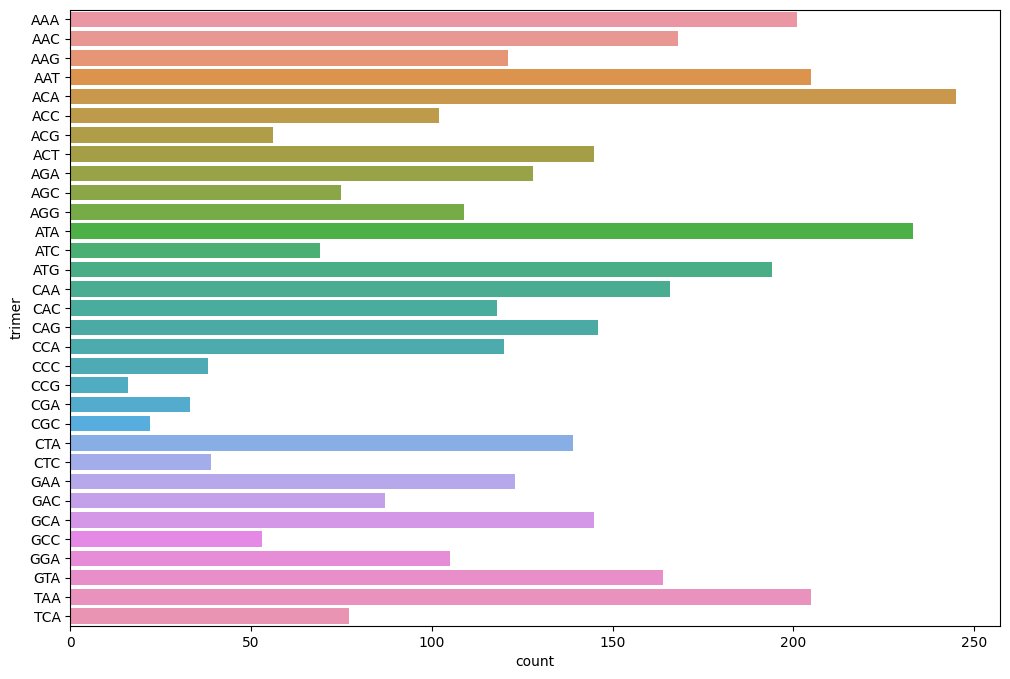

In [73]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="count", y="trimer", ax=ax, data=tri)

#**Protein Synthesis**

**Transcription** is the process by which the information in a strand of DNA is copied into a new molecule of messenger RNA (mRNA), while **translation** refers to the process of using RNA to create proteins.

Transcription occurs within the nucleus, where DNA serves as a template for generating an RNA molecule. Subsequently, the RNA molecule exits the nucleus and travels to a ribosome located in the cytoplasm, where translation takes place. During translation, the genetic code present in the mRNA is read, leading to the synthesis of **proteins**.

Protein Synthesis

In [90]:
#Transcription
ncov_mrna = ncov_dna.transcribe()
ncov_mrna

Seq('AUGGCUGAUCCUGCAGGUACCAAUGGGGAAGAGGGUACGGGAUGUAAUGGAUGG...ACC')

In [92]:
#Translation
ncov_protein = ncov_mrna.translate()
ncov_protein

Seq('MADPAGTNGEEGTGCNGWFYVEAVVEKKTGDAISDDENENDSDTGEDLVDFIVN...IIY')

In [93]:
#Number of Proteins
len(ncov_protein)

2635

In [94]:
#Finding the amino acids from the protein structure
ncov_aa = ncov_protein.split("*")
ncov_aa[0:10]

[Seq('MADPAGTNGEEGTGCNGWFYVEAVVEKKTGDAISDDENENDSDTGEDLVDFIVN...NTL'),
 Seq('K'),
 Seq(''),
 Seq('YRPT'),
 Seq('PYRLLETHAPRMCYLLQGQRNGI'),
 Seq('TY'),
 Seq('PPGGANTGCIKE'),
 Seq('SITSN'),
 Seq('TATNVRNNI'),
 Seq('LTI')]

In [95]:
#Cleaning the list of proteins
ncov_clean = [ str(i) for i in ncov_aa]

In [96]:
#Identifying all the proteins (chains of amino acids)
Proteins = ncov_protein.split('*')
Proteins[0:10]

[Seq('MADPAGTNGEEGTGCNGWFYVEAVVEKKTGDAISDDENENDSDTGEDLVDFIVN...NTL'),
 Seq('K'),
 Seq(''),
 Seq('YRPT'),
 Seq('PYRLLETHAPRMCYLLQGQRNGI'),
 Seq('TY'),
 Seq('PPGGANTGCIKE'),
 Seq('SITSN'),
 Seq('TATNVRNNI'),
 Seq('LTI')]

In [97]:
#Removing chains smaller than 10 amino acids long
for i in Proteins[:]:
    if len(i) < 10:
        Proteins.remove(i)

##Protein Analysis

In [98]:
df = pd.DataFrame({"amino_acids":ncov_clean})

In [99]:
df['count'] = df['amino_acids'].str.len()

In [101]:
df.nlargest(6, "count")

,amino_acids,count
0,MADPAGTNGEEGTGCNGWFYVEAVVEKKTGDAISDDENENDSDTGE...,649
46,LLYTITYYFFFFIFIYNFFFCLFVCFLINCYYLTMRHKRSAKRTKR...,507
43,NTKNYYSVYWIYVYMTNLDTASTTLLACFLLCFCVLLCVCLLIRPL...,97
90,KIHFLGSKFKGKVFCRPRSVSFRTQIFTTSRIEGQTKIYIRKTKSY...,56
97,TIFATSCFCFIYTIFCSASGHFVASTEFGCMLFGTKCVFLNSSMSATMV,49
104,PKSVEPKPVSIKADILCTKRELQCFRTHRSDPESYHSYAQSCKQLYMI,48


Let's take a look at the largest amino acid (loci 0)

In [102]:
#protein of interest
soi=df['amino_acids'].iloc[0]
seq_oi=Seq(soi)
seq_oi

Seq('MADPAGTNGEEGTGCNGWFYVEAVVEKKTGDAISDDENENDSDTGEDLVDFIVN...NTL')

In [103]:
#cleaning
soi1=''
for i in soi:
    if(i!='X'):
        soi1=soi1+i
print(len(soi1))

649


In [104]:
a=ProteinAnalysis(soi1)
a

In [105]:
#Molecular Weight
MW=a.molecular_weight()
MW

72895.78220000025

In [106]:
#Aromaticity
aromaticity=a.aromaticity()
aromaticity

0.09553158705701079

In [107]:
#IsoElectric Point
IsoElectric=a.isoelectric_point()
IsoElectric

5.624411582946778

###Amino Acid Composition

In [108]:
def amino_acid_composition(protein_seq):
    amino_acids_dict = {'Y': 0, 'A': 0, 'Q': 0, 'D': 0, 'C': 0, 'G': 0, 'V': 0, 'T': 0, 'E': 0, 'N': 0,
                       'K': 0, 'R': 0, 'S': 0, 'I': 0, 'H': 0, 'M': 0, 'F': 0, 'L': 0, 'W': 0, 'P': 0}
    for amino_acid in amino_acids_dict:
        amino_acids_dict[amino_acid] = protein_seq.count(amino_acid)/len(protein_seq)*100
    return amino_acids_dict

In [109]:
ac = amino_acid_composition(ncov_protein)
amc = pd.DataFrame.from_dict(ac, orient ='index')
amc = amc.reset_index()
amc = amc.rename(columns={"index": "amino_acid", 0: "composition"})

In [113]:
r = amc.sort_values(by='composition', ascending=False)
r.style.bar(subset=["composition"],color='#').background_gradient(cmap='YlGnBu_r')

,amino_acid,composition
7,T,8.614801
17,L,8.159393
12,S,7.817837
13,I,7.134725
6,V,5.768501
0,Y,5.654649
5,G,5.313093
11,R,4.895636
4,C,4.895636
9,N,4.592030


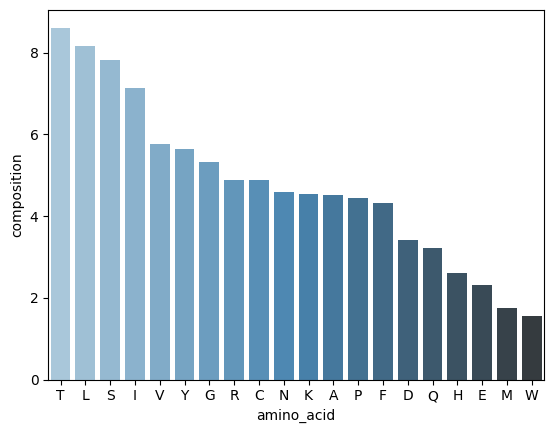

In [111]:
ax = sns.barplot(x="amino_acid", y="composition", data=r,
                 palette="Blues_d")

#**ORF**


In the field of molecular genetics, an open reading frame (**ORF**) refers to a specific region within a genetic sequence that has the potential to be translated into a protein. An ORF is characterized by a consecutive series of codons, starting with a start codon and ending with a stop codon. The presence of an ATG codon within the ORF typically indicates the initiation site for translation, marking the beginning of protein synthesis.

In [114]:
#ORF
orf_strands = []
# generate ORFs
for seq in ncov_protein.split("STOP"):
    for nu in range(len(seq)-1, -1, -1):
        if seq[nu] == "M":
            orf_strands.append(seq[nu:]+"STOP")

orf_strands[0:10]

[Seq('MEQH*NSNTTNRCVIC*LGVLTVKSHCVLKKSKDIWTKSKDSII*GVGGPVDVC...TOP'),
 Seq('MLYVINV*SFILKLVSIDIIVIVCMEQH*NSNTTNRCVIC*LGVLTVKSHCVLK...TOP'),
 Seq('MGIHMLYVINV*SFILKLVSIDIIVIVCMEQH*NSNTTNRCVIC*LGVLTVKSH...TOP'),
 Seq('MTLLFGIYA*YIEMGIHMLYVINV*SFILKLVSIDIIVIVCMEQH*NSNTTNRC...TOP'),
 Seq('MI*Y*NVCTASNSYCDVRYMTLLFGIYA*YIEMGIHMLYVINV*SFILKLVSID...TOP'),
 Seq('MGVCKPFWVTHLQATYIIILNYNNSCIKLRA*PKSVEPKPVSIKADILCTKREL...TOP'),
 Seq('MYIVSYKINHYAPTPYIPLLGTYFWLVLTNLIAYLA*GLNF*GQLNVTLVHT*T...TOP'),
 Seq('MCNY*ITMYIVSYKINHYAPTPYIPLLGTYFWLVLTNLIAYLA*GLNF*GQLNV...TOP'),
 Seq('MV*TCTFPACHACQIPVFLTCTACQPFHCFLHCTMCNY*ITMYIVSYKINHYAP...TOP'),
 Seq('MSATMV*TCTFPACHACQIPVFLTCTACQPFHCFLHCTMCNY*ITMYIVSYKIN...TOP')]

In [115]:
#Total number of ORF strands
len(orf_strands)

46